## Number of comets falling into 1 AU sphere 

Using ```Notebook3_p1_Time_periods_inside_1AU.py```, we compute the time intervals during which comets from the inner and outer Oort clouds, perturbed by HD 7977, enter within 1 AU of the Sun and remain inside a 1 AU sphere. Using ```Notebook3_p2_Connect_intervals.py```, we concatenate all time intervals into a single text file. Using ```Notebook3_p3_Number_in_1AU.cpp```, we employ the segment tree method to calculate the number of comets within the 1 AU sphere at each time point. Finally, we utilize this notebook to generate the plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.signal import savgol_filter

In [2]:
def average_vector_difference(r1, r2):
    
    def integrand(theta):
        return np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * np.cos(theta))
    
    pdf = 1 / np.pi  # Probability density function for theta, uniform in [0, pi]

    result, _ = quad(lambda theta: pdf * integrand(theta), 0, np.pi)
    
    return result


In [ ]:
time = np.linspace(-3.47e6, 0, 10000000)  

result2300 = np.loadtxt('result_2300.txt')     
result_scaled = result2300 / (1e10 + 1e10/5) * 6e12
result_2300 = savgol_filter(result_scaled, 3001, 3) 

result6394 = np.loadtxt('result_6394.txt')          
result_scaled1 = result6394 / (1e10 + 1e10/5) * 6e12
result_6394 = savgol_filter(result_scaled1, 3001, 3) 

result12376 = np.loadtxt('result_12376.txt')          
result_scaled2 = result12376 / (1e10 + 1e10/5) * 6e12
result_12376 = savgol_filter(result_scaled2, 3001, 3) 


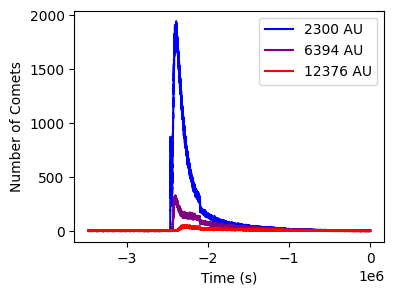

In [5]:
num_2300 = result_2300
num_6394 = result_6394
num_12376 = result_12376

plt.figure(figsize=(4, 3))
plt.plot(time, num_2300, label='2300 AU', color='blue')
plt.plot(time, num_6394, label='6394 AU', color='purple')
plt.plot(time, num_12376, label='12376 AU', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Number of Comets')
plt.legend()
plt.show()